# Perceptron

Perceptron is a type of **neural network model**, perhaps the simplest type of neural network model. It consists of a single node (**`Neuron`**) that takes a row of data as input and predicts a class label as output.

左邊的突觸(Dendrites) 是神經接收訊息(input)的地方，若input的訊號總和強度大於等於某一個值(threshold)，這個神經元就會透過軸突(axon)發送訊息 (output)下一個神經元。E.g. 膝蓋被打超過一定的力道時，膝蓋神經就會發出訊號給肌肉內的神經進行所謂的膝反射。

<img src="https://www.mdpi.com/agriculture/agriculture-11-00827/article_deploy/html/images/agriculture-11-00827-g001.png" alt="drawing" width="800"/>

- Supervised Learning
- Binary Classifiers : a type of LINEAR Classifier
- Limitation: Perceptron is able to offer accurate results **ONLY IF** the analyzed data can be **`Linearly separable`**
>  2D：在平面上找「一條線」去完全切出這兩群 </br>
>  3D：在空間中找「一個平面」去切出兩群

<img src="https://miro.medium.com/max/1400/1*HAmYr3Prou-kZ-38OZf-Uw.png
" alt="drawing" width="800"/>



# Methodology
- https://www.simplilearn.com/tutorials/deep-learning-tutorial/perceptron
- https://vitalflux.com/perceptron-explained-using-python-example/

<img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/Perceptron/Perceptron_8.jpg
" alt="drawing" width="800"/>


1. Input
2. weight
3. Transfer Function >> Net input function

> <img src="https://pythonmachinelearning.pro/wp-content/ql-cache/quicklatex.com-34ae55253336a26866461d2e37d4bd81_l3.png
" alt="drawing" width="250"/>

4. Activation Function

The activation function is a non-linear activation function. The activation functions are of different types such as the following:
> <img src="https://vitalflux.com/wp-content/uploads/2020/10/Neural-network-Common-activation-functions-.png
" alt="drawing" width="1250"/>


- Unit step function
- Sigmoid function (Popular one as it outputs number between 0 and 1 and thus can be used to represent probability)
- Rectilinear (ReLU) function
- Hyperbolic tangent

5. Output (threshold) >> 1 or -1
> <img src="https://pythonmachinelearning.pro/wp-content/ql-cache/quicklatex.com-bea8f3a6e8fb15cdf45b49ce21599a5b_l3.png
" alt="drawing" width="150"/>

# Pros & Cons
Pros :
1. 最簡單的線性分類演算法，Perceptron演算法的原理可推廣至其他複雜的演算法，因此許多課程或是書籍皆會以此當作最初的教材。


Cons :
1. 一定要線性可分Perceptron演算法才會停下來（實務上我們沒辦法事先知道資料是否線性可分）
2. Perceptron演算法的錯誤率不會逐步收斂
3. Perceptron演算法只知道結果是A類還B類，但沒辦法知道是A, B類的機率是多少

# Simple Case


##case 1  
四個樣本, 兩類(A和B)，要怎麼找到一條線把 A 和 B 切開? 

<img src="https://miro.medium.com/max/1298/1*GPSsJMWlf44TK0puA8VCLw.png
" alt="drawing" width="400"/> . .
<img src="https://miro.medium.com/max/1298/1*GXl_Sr6fsEPs0scHA-8bMQ.png
" alt="drawing" width="400"/>

<img src="https://miro.medium.com/max/1182/1*EBzwBb9ikpMCe8UyLDj7cw.png
" alt="drawing" width="400"/>


## case 2
以 Iris dataset資料為例，透過 `花萼長度(petal)` 以及 `花瓣長度(sepal)` 來判斷 Iris 花是屬於 Setosa 或是 Versicolor

> 數學模型：

> w1 * 花萼的長度 ＋ w2 * 花瓣的長度 + 常數 > 0

<img src="https://miro.medium.com/max/1000/0*oUoXifiKu3tT5REt.png
" alt="drawing" width="800"/>




In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_iris = sns.load_dataset('iris')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


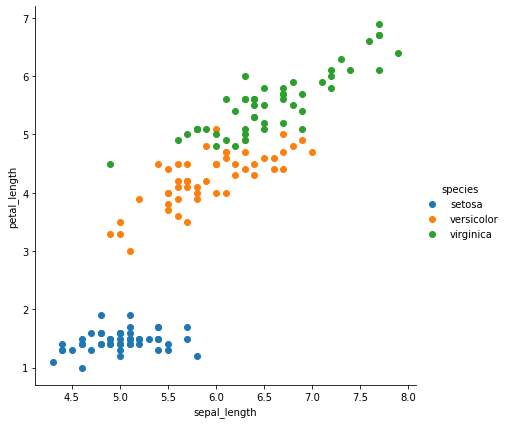

In [ ]:
sns.FacetGrid(df_iris, hue ="species",
              height = 6).map(plt.scatter,
                              'sepal_length',
                              'petal_length').add_legend()

In [ ]:
# 為了簡化，只取 sepal length ＆ petal length 兩個欄位
# df_iris['target_name'] = iris_data['target'].map(target_name)
df_iris = df_iris[(df_iris['species'] == 'setosa')|(df_iris['species'] == 'versicolor')]
df_iris = df_iris[['sepal_length','petal_length','species']]
df_iris.head(5)

,sepal_length,petal_length,species
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa


把這 target_name 欄位的兩種花改成 1, -1，主要是為了往後方便計算

In [ ]:
target_class = {
    'setosa':1,
    'versicolor':-1
}

In [ ]:
df_iris['target_class'] = df_iris['species'].map(target_class)
df_iris.head()

,sepal_length,petal_length,species,target_class
0,5.1,1.4,setosa,1
1,4.9,1.4,setosa,1
2,4.7,1.3,setosa,1
3,4.6,1.5,setosa,1
4,5.0,1.4,setosa,1


In [ ]:
del df_iris['species']

df_iris.head()

,sepal_length,petal_length,target_class
0,5.1,1.4,1
1,4.9,1.4,1
2,4.7,1.3,1
3,4.6,1.5,1
4,5.0,1.4,1


激勵函數，取名叫sign

In [ ]:
def sign(z):
    if z > 0:
        return 1
    else:
        return -1

In [ ]:
w = np.array([1., 5.7, 3.5])

x = np.concatenate((np.array([1.]), np.array(df_iris.iloc[2])[:2]))
y = np.array(df_iris.iloc[i])[2]
print('w=',w)
print('x=',x)
print('y=',y)
print(np.dot(w,x))


w= [1.  5.7 3.5]
x= [1.  4.7 1.3]
y= -1.0
32.34



iterator: 0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


x: [1.  5.1 1.4]
w: [1.  5.1 1.4]


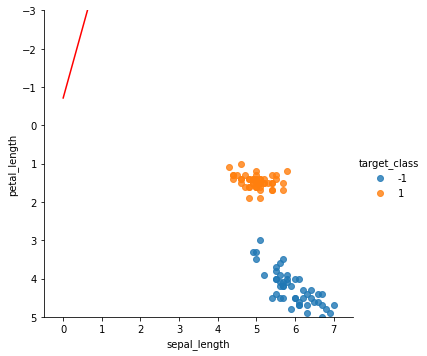


iterator: 1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


x: [1.  7.  4.7]
w: [ 0.  -1.9 -3.3]


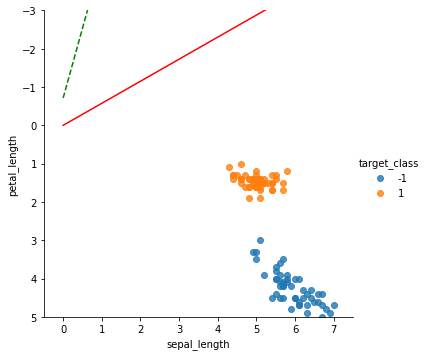


iterator: 2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


x: [1.  5.1 1.4]
w: [ 1.   3.2 -1.9]


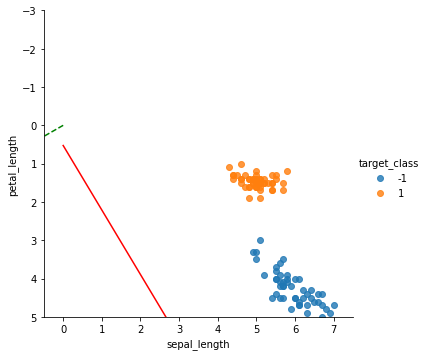


iterator: 3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


x: [1.  7.  4.7]
w: [ 0.  -3.8 -6.6]


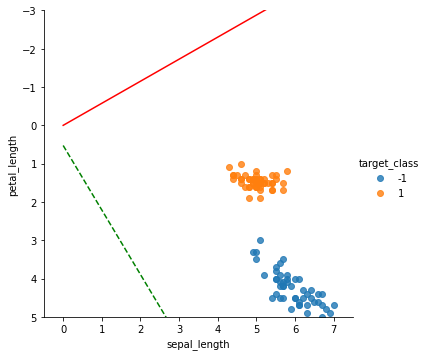


iterator: 4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


x: [1.  5.1 1.4]
w: [ 1.   1.3 -5.2]


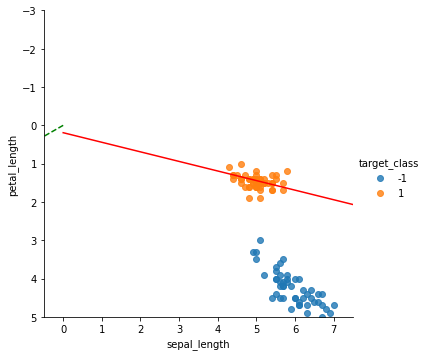


iterator: 5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


x: [1.  4.6 1.5]
w: [ 2.   5.9 -3.7]


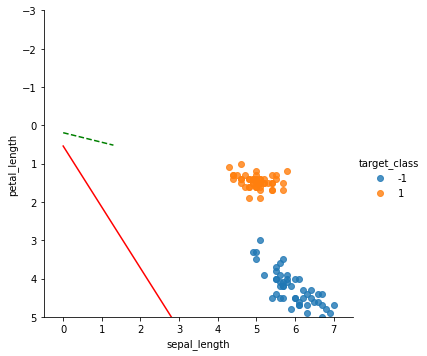


iterator: 6


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


x: [1.  7.  4.7]
w: [ 1.  -1.1 -8.4]


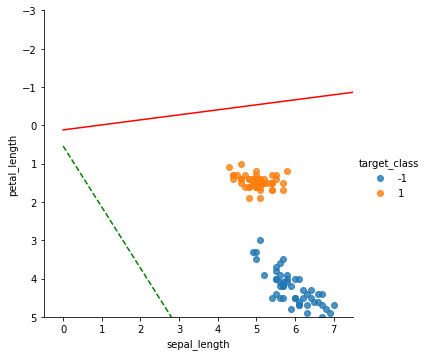


iterator: 7


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


x: [1.  5.1 1.4]
w: [ 2.  4. -7.]


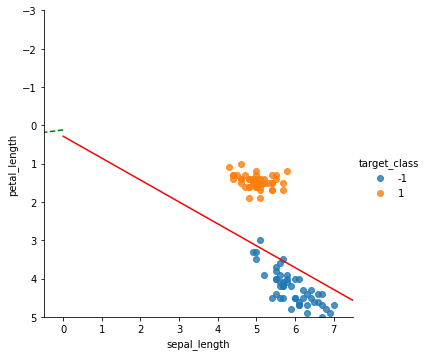


iterator: 8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


x: [1.  5.7 3.5]
w: [  1.   -1.7 -10.5]


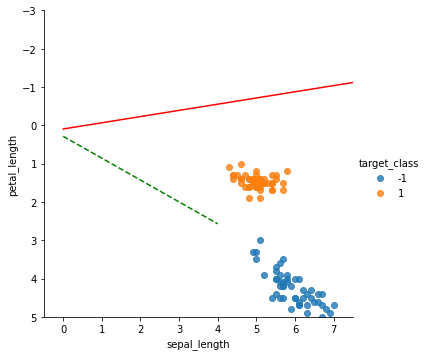


iterator: 9


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


x: [1.  5.1 1.4]
w: [ 2.   3.4 -9.1]


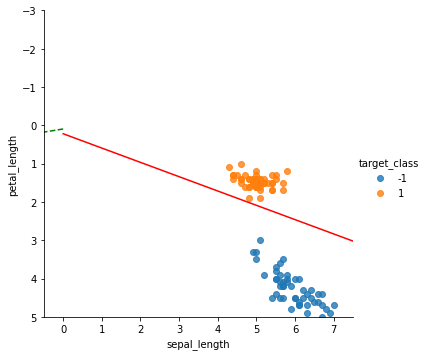

In [ ]:
#@title from scratch 
# 初始化 w =[0,0,0] ，你也可以自訂任何想要的數字，w都會透過之後的更新，來自動調整。
w = np.array([0.,0.,0.])

# error =1 主要是紀錄沒有錯誤分類的話就停止，這也是為什麼一定要線性可分，如果資料不是線性可分的話，一定至少有一個錯誤分類存在，因此不會停止。
error = 1

# iterator主要是用來記錄更新了幾次。
iterator = 0

while error != 0:
    error = 0

    # 寫個迴圈一筆一筆去跑iris裡面的資料。
    for i in range(len(df_iris)):

        # 整理成 input = [x0, x1, x2] 的形式，方便起見， x0 一律先指定＝1
        x = np.concatenate((np.array([1.]), np.array(df_iris.iloc[i])[:2]))
        # output = [1 or -1] 的形式
        y = np.array(df_iris.iloc[i])[2]
        # print('x,y =',x,y)

        # if sign(np.dot(w,x)) != y: 則是指預測失敗時
        if sign(np.dot(w,x)) != y:
            print('\n ============')
            print("iterator: "+ str(iterator))
            iterator += 1
            error += 1

            # sns.lmplot(迴歸圖)
            sns.lmplot('sepal_length','petal_length', data=df_iris, fit_reg=False, hue ='target_class')
            
            # 前一個 Decision boundary 向量
            if w[1] != 0:
                x_last_decision_boundary = np.linspace(0,w[1])
                y_last_decision_boundary = (-w[1]/w[2])*x_last_decision_boundary - (w[0]/w[2])
                plt.plot(x_last_decision_boundary, y_last_decision_boundary,'g--')
            w += y*x            
            print("x: " + str(x))            
            print("w: " + str(w))

            x_decision_boundary = np.linspace( 0,10)
            y_decision_boundary = (-w[1]/w[2])*x_decision_boundary - (w[0]/w[2])
            plt.plot(x_decision_boundary, y_decision_boundary,'r')
            plt.xlim(-0.5,7.5)
            plt.ylim(5,-3)
            plt.show()

In [ ]:
#@title sklearn
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron.predict
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

df_iris.head()

X = df_iris[['sepal_length','petal_length']]
y = df_iris['target_class']

clf = Perceptron()
clf.fit(X, y)

clf.predict(X)

training_results = clf.predict(X)
print(training_results)

training_error = 1 - accuracy_score(training_results, y)  #or pick your metric from metrics module.
print(accuracy_score(training_results, y))
print(training_error)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]
1.0
0.0


In [ ]:
clf.decision_function(X)

array([ 12.24,  11.24,  11.33,   8.65,  11.74,  10.47,   9.74,  10.65,
         8.74,  10.15,  12.65,   8.56,  10.74,  11.51,  17.92,  14.15,
        14.83,  12.24,  11.97,  11.15,  10.47,  11.15,  14.1 ,   8.97,
         5.29,   9.56,   9.56,  11.65,  12.74,   8.06,   8.56,  12.65,
        11.65,  14.24,  10.15,  13.92,  15.33,  11.24,   9.83,  11.15,
        12.83,  10.33,   9.83,   9.56,   6.79,  10.74,  10.06,   9.74,
        12.15,  11.74, -14.23, -15.05, -16.91, -14.1 , -15.64, -18.55,
       -17.73,  -9.47, -15.14, -14.51, -11.15, -14.28, -11.6 , -18.73,
        -9.24, -12.46, -19.05, -13.69, -16.05, -12.51, -20.82, -11.1 ,
       -19.91, -18.73, -12.87, -12.96, -16.32, -19.  , -17.05,  -7.65,
       -11.92, -10.83, -11.51, -23.59, -20.05, -17.05, -15.73, -14.46,
       -14.69, -14.1 , -18.46, -17.64, -12.6 ,  -8.97, -15.78, -15.28,
       -15.28, -13.87,  -5.2 , -14.19])

In [ ]:
#@title sklearn
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron.predict
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

df_iris = sns.load_dataset('iris')
df_iris.head()

X = df_iris[['sepal_length','petal_length', 'sepal_width', 'petal_width']]

target_class = {
    'setosa':0,
    'versicolor':1,
    'virginica':2
}

df_iris['target_class'] = df_iris['species'].map(target_class)
df_iris

y = df_iris['target_class']

clf = Perceptron()
clf.fit(X, y)

clf.predict(X)

training_results = clf.predict(X)
print(training_results)

training_error = 1 - accuracy_score(training_results, y)  #or pick your metric from metrics module.
print(accuracy_score(training_results, y))
print(training_error)

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 2 1
 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 2 2 1 1 1
 2 1]
0.48
0.52


# Single Layer Perceptron

- [機器學習- 神經網路(多層感知機 Multilayer perceptron, MLP)運作方式](https://chih-sheng-huang821.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF-%E5%A4%9A%E5%B1%A4%E6%84%9F%E7%9F%A5%E6%A9%9F-multilayer-perceptron-mlp-%E9%81%8B%E4%BD%9C%E6%96%B9%E5%BC%8F-f0e108e8b9af)


<img src="https://ithelp.ithome.com.tw/upload/images/20190922/201125682eWF2cqWjW.png" alt="drawing" width="800"/>








# Multiple Layer Perceptron
<img src="https://ithelp.ithome.com.tw/upload/images/20190922/20112568MDOXKebn0N.png" alt="drawing" width="800"/>

## XOR problem (exclusive or) 
<img src="https://miro.medium.com/max/1298/1*05PTP6Ikg1meOKaQVAIGPg.png" alt="drawing" width="300"/><img src="https://miro.medium.com/max/1298/1*DwRoCQmO-fISwBnyQK3xZA.png" alt="drawing" width="300"/>

一條線其實就是一個Perceptron，這樣此問題就會用到兩個Perceptrons來解決問題。

<img src="https://miro.medium.com/max/1400/1*GMkCB795d_TTbv6i5clPgg.png" alt="drawing" width="800"/>


<img src="https://miro.medium.com/max/1400/1*j-JeBMgyBA02TFMXkg_rjg.png" alt="drawing" width="800"/>


由ＸＯＲ問題的例子可以知道，第一層兩個Perceptron在做的事情其實是將資料投影到另一個特徵空間去（這個特徵空間大小是根據你設計的Perceptron數目決定的），所以最後再把h1和h2的結果當作另一個Perceptron的輸入，再做一個下一層的Perceptron就可以完美分類XOR問題啦。

<img src="https://miro.medium.com/max/1400/1*FPB9N-GLCg3MxLvrMvpihg.png" alt="drawing" width="600"/>



上面的例子其實就是一個 Two-Layer Perceptrons，第一層的Perceptron輸出其實就是每個 Hidden node，所以如果hidden layer再多一層就是Three-Layer Perceptrons，所以很多層的Perceptrons組合起來就是多層感知機 (Multilayer perceptron, MLP)。

<img src="https://miro.medium.com/max/1400/1*hWbfJXWqu_OPqKnQYdaLjw.png" alt="drawing" width="600"/>



# RNN - Recurrent Neural Networks

遞歸神經網絡（RNNs）被設計成處理 **序列** 預測問題。

- I like to eat apple because I don't like pineapple
- I hate eating apple, I'd go for a pineapple


序列預測問題有多種形式，最好用所支持的輸入和輸出類型來描述。
序列預測問題的一些示例包括：
- 一對多：作爲輸入的觀察映射到多個步驟的輸出序列。（也就是用一步觀測值往後預測多步）
- 多對一：作爲輸入映射到類或數量預測的多個步驟的序列。（多步觀測值預測一個類別或一步）
- 多對多：作爲輸入的多個步驟的序列，映射到具有多個步驟作爲輸出的序列。（多步觀測值預測多步）
- 多對多問題通常被稱爲序列對序列，或簡稱seq2seq。

<img src="https://i.iter01.com/images/41f1c2a3df61154b0628b247515af44c69470b117d5b334e2acf43906fd01117.jpg" alt="drawing" width="600"/>

